In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(170)

In [3]:
combinedchis = pd.read_csv("data/combined_chis.csv")

## Separate input and output variables

In [4]:
X = combinedchis.iloc[:,:-1]
X

,AA5C,AB1,AB100,AB112,AB113,AB115,AB117,AB118,AB119,AB127,...,AH141,SREDUC,AJ153V2_13,AJ154BV2_8,AJ154BV2_9,INS64_S,AK20_P1,AJ174_8,AJ174_9,AJ194_18
0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.0,5.0,-1.0,-1.0,-1.0,2.0,2.0,2.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189118,-1.0,2.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,3.0,-1.0,-1.0,-1.0,5.0,4.0,-1.0,-1.0,-1.0
189119,-1.0,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,4.0,-1.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0
189120,-1.0,2.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
189121,-1.0,3.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [5]:
y = combinedchis.iloc[:, -1]
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
189118    0.0
189119    0.0
189120    0.0
189121    0.0
189122    0.0
Name: T2D, Length: 189123, dtype: float64

## Split training and test data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, stratify=y)

## Fill NaN values and remove features

In [7]:
# remove id feature and features that already imply diabetes
diabetes_features = [
    "PUF1Y_ID", "AB111", "AB23_P1", "AB114_P1", "AJ82", "AB22V2", "DIABETES", "AB81", "AB113", 
    "AB112", "AB51_P1", "AB110_P", "AB109", "AB24", "DIAMED", "AB25", "AB63", "AB27_P1", "AB28_P1",
    "AB26_P1", "DIABCK_P1", "AB27_P", "AJ80"
]
similar_features = ["WEIGHK_P", "WGHTK_P", "HEIGHM_P", "HGHTM_P", "WHOBMI"]
remove_features = diabetes_features + similar_features
X_train = X_train.drop(remove_features, axis=1)
X_test = X_test.drop(remove_features, axis=1)
X_train.shape

(132386, 756)

In [8]:
# Find the features that have continuous values
numerical_features = []
for column in X_train:
    # ignores the id feature
    if column != 'PUF1Y_ID':
        if X_train[column].unique().size >= 21:
            numerical_features.append(column)
print(numerical_features)
print(len(numerical_features))

['AC11', 'AD39W', 'AD41W', 'AD42W', 'AE2', 'AE3', 'AE7', 'AE_FRIES', 'AE_FRUIT', 'AE_SODA', 'AE_VEGI', 'DSTRSYR', 'AK10_P', 'AK10A_P', 'AK22_P', 'HGHTI_P', 'WGHTP_P', 'WT18K_P', 'WT18P_P', 'BMI_P', 'POVGWD_P1', 'DSTRS_P1', 'AD38W', 'AC46', 'DISTRESS', 'AK7_P1', 'AC47', 'AC59', 'AC87', 'AC52_P1', 'AC31', 'POVLL2_P1V2', 'AC111', 'TIMEAD_P1V2', 'AH128', 'AH5', 'AE5', 'AH132', 'AH136', 'TCURPLAN', 'AH129', 'AJ93', 'AH44B', 'AJ115_P1']
44


In [9]:
X_train[numerical_features].describe()

,AC11,AD39W,AD41W,AD42W,AE2,AE3,AE7,AE_FRIES,AE_FRUIT,AE_SODA,...,AH128,AH5,AE5,AH132,AH136,TCURPLAN,AH129,AJ93,AH44B,AJ115_P1
count,86601.000000,58425.00000,86601.000000,86601.000000,74804.000000,43869.000000,74804.000000,43869.000000,74804.000000,86601.000000,...,60497.000000,60497.000000,29562.000000,60497.000000,60497.000000,60497.000000,45785.000000,30935.000000,30935.000000,30935.000000
mean,6.225817,14.49080,2.566472,21.572707,35.950898,4.522921,36.126531,0.965967,8.361799,1.418194,...,160.601104,4.970263,6.632501,117.057391,99.425426,117.727210,222.574752,2.879813,38.537353,1.600647
std,17.941921,34.79404,4.295706,35.110732,39.636610,8.416086,35.579459,1.986449,9.212908,4.183456,...,390.619497,9.561689,11.706894,139.212169,137.331550,138.661022,561.562075,12.451999,287.064438,4.232458
min,0.000000,-1.00000,-8.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-9.000000,-2.000000,-1.000000,0.000000
25%,0.000000,-1.00000,-1.000000,-1.000000,13.000000,0.000000,17.000000,0.000000,3.000000,0.000000,...,-1.000000,1.000000,1.000000,24.000000,-1.000000,24.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,5.00000,2.000000,15.000000,30.000000,2.000000,30.000000,0.000000,7.000000,0.000000,...,-1.000000,3.000000,4.000000,60.000000,36.000000,60.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,4.000000,20.00000,5.000000,30.000000,60.000000,5.000000,60.000000,1.000000,14.000000,1.000000,...,160.000000,5.000000,9.000000,180.000000,144.000000,180.000000,200.000000,1.000000,-1.000000,2.000000
max,300.000000,600.00000,100.000000,3600.000000,600.000000,360.000000,600.000000,83.000000,139.000000,69.000000,...,9000.000000,365.000000,360.000000,731.000000,727.000000,731.000000,9997.000000,125.000000,12000.000000,31.000000


c:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AD42W'>

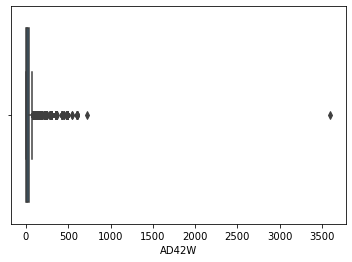

In [10]:
sns.boxplot(X_train["AD42W"])

In [11]:
# remove the categorical variables in the numerical features list
numerical_features.remove('TIMEAD_P1V2')
numerical_features.remove('AJ115_P1')
print(numerical_features)
print(len(numerical_features))

['AC11', 'AD39W', 'AD41W', 'AD42W', 'AE2', 'AE3', 'AE7', 'AE_FRIES', 'AE_FRUIT', 'AE_SODA', 'AE_VEGI', 'DSTRSYR', 'AK10_P', 'AK10A_P', 'AK22_P', 'HGHTI_P', 'WGHTP_P', 'WT18K_P', 'WT18P_P', 'BMI_P', 'POVGWD_P1', 'DSTRS_P1', 'AD38W', 'AC46', 'DISTRESS', 'AK7_P1', 'AC47', 'AC59', 'AC87', 'AC52_P1', 'AC31', 'POVLL2_P1V2', 'AC111', 'AH128', 'AH5', 'AE5', 'AH132', 'AH136', 'TCURPLAN', 'AH129', 'AJ93', 'AH44B']
42


In [12]:
categorical_features = X_train.drop(numerical_features, axis=1)
categorical_features = categorical_features.columns

In [13]:
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer

# all_features = X_train.columns
# # create a pipeline that applies the transformations to the dataset
# pipeline = ColumnTransformer(
#     [
#         ("categorical", SimpleImputer(strategy="most_frequent"), categorical_features),
#         ("numerical", SimpleImputer(strategy="mean"), numerical_features)
#     ],
#     remainder="passthrough"
# )
# # apply transformations to both training and test
# # X_train = pd.DataFrame(pipeline.fit_transform(X_train), columns=pipeline.get_feature_names_out())
# # X_test = pd.DataFrame(pipeline.transform(X_test))

In [14]:
# fill the numerical features with the median in the training set
for col in numerical_features:
    X_train[col] = X_train[col].fillna(X_train[col].median())

In [15]:
# fill the numerical features with the median in the test data
for col in numerical_features:
    X_test[col] = X_test[col].fillna(X_train[col].median())

In [16]:
# fill in the categorical features with the mode
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
X_train[:] = imputer.fit_transform(X_train)
X_test[:] = imputer.transform(X_test)

## Feature Selection

In [17]:
# chis = pd.concat([X_train, y_train], axis=1)
# corrmat = chis.corr()

In [18]:
# corrmat["T2D"].nlargest(12)

In [19]:
# features = corrmat["T2D"].nlargest(12)[2:].index
# features

In [20]:
# # checks if there are any NaN values in any of the features
# X_train[features].isnull().sum()

In [21]:
# # see if number of features are the same for training and testing 
# X_train = X_train[features]
# X_test = X_test[features]
# print(X_train.shape)
# print(X_test.shape)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
model = RandomForestClassifier(random_state=0)
sel = SelectFromModel(model)
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

246
Index(['AB1', 'AB118', 'AB18', 'AB29V2', 'AB30', 'AB34', 'AB40', 'AB41',
       'AB43', 'AB52',
       ...
       'AH129', 'AC146', 'AC147', 'AC148', 'AC160', 'AC161', 'AG44', 'AG45',
       'AM44', 'AM45'],
      dtype='object', length=246)


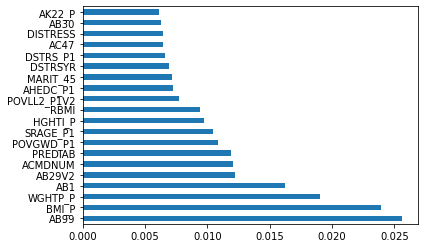

In [23]:
model.fit(X_train, y_train)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [24]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]
X_train.shape

(132386, 246)

## Convert training and test data to CSV files

In [25]:
X_train.to_csv('data\X_train.csv', index = False)
X_test.to_csv('data\X_test.csv', index = False)
y_train.to_csv('data\y_train.csv', index = False)
y_test.to_csv('data\y_test.csv', index = False)